# Homework 4.

> **Instructions:** Pick one of the examples of the chapter that use the data of the book and replicate it in Python. Then, apply the steps in your own data. 

The example we are going to be using is going to be the South African Heart Disease.

First we download the dataset and load it into our notebook. 

In [ ]:
import pandas as pd
import numpy as np

dataset = pd.read_csv('/content/drive/MyDrive/Datasets/sahd.csv')
dataset = dataset.drop('row.names', axis=1)

In [ ]:
dataset.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


Here we can see some of the variables. 

|Name of variable | Description |
|-----------------|-------------|
|sbp              |Systolic blood presure|
|tobacco | Cumulative tobacco (kg) |
|ldl | Low density lipoprotein cholesterol|
|adiposity | |
|famhist | Family history of heart disease |
|typea | Type-A behavior |
|obesity | |
|alcohol | Current alcohol consumption |
|age | Age at onset |
|chd | Response coronary heart disease (1 is positive and 0 is negative)|

This information was gathered [here](https://www.kaggle.com/c/SAheart/data).



First we see in Figure 4.12 in the book that they ploted a similar pairplot than we did in our last homework. We import the library seaborn and plot a pairplot with the `chd` variable as target value. 



No handles with labels found to put in legend.


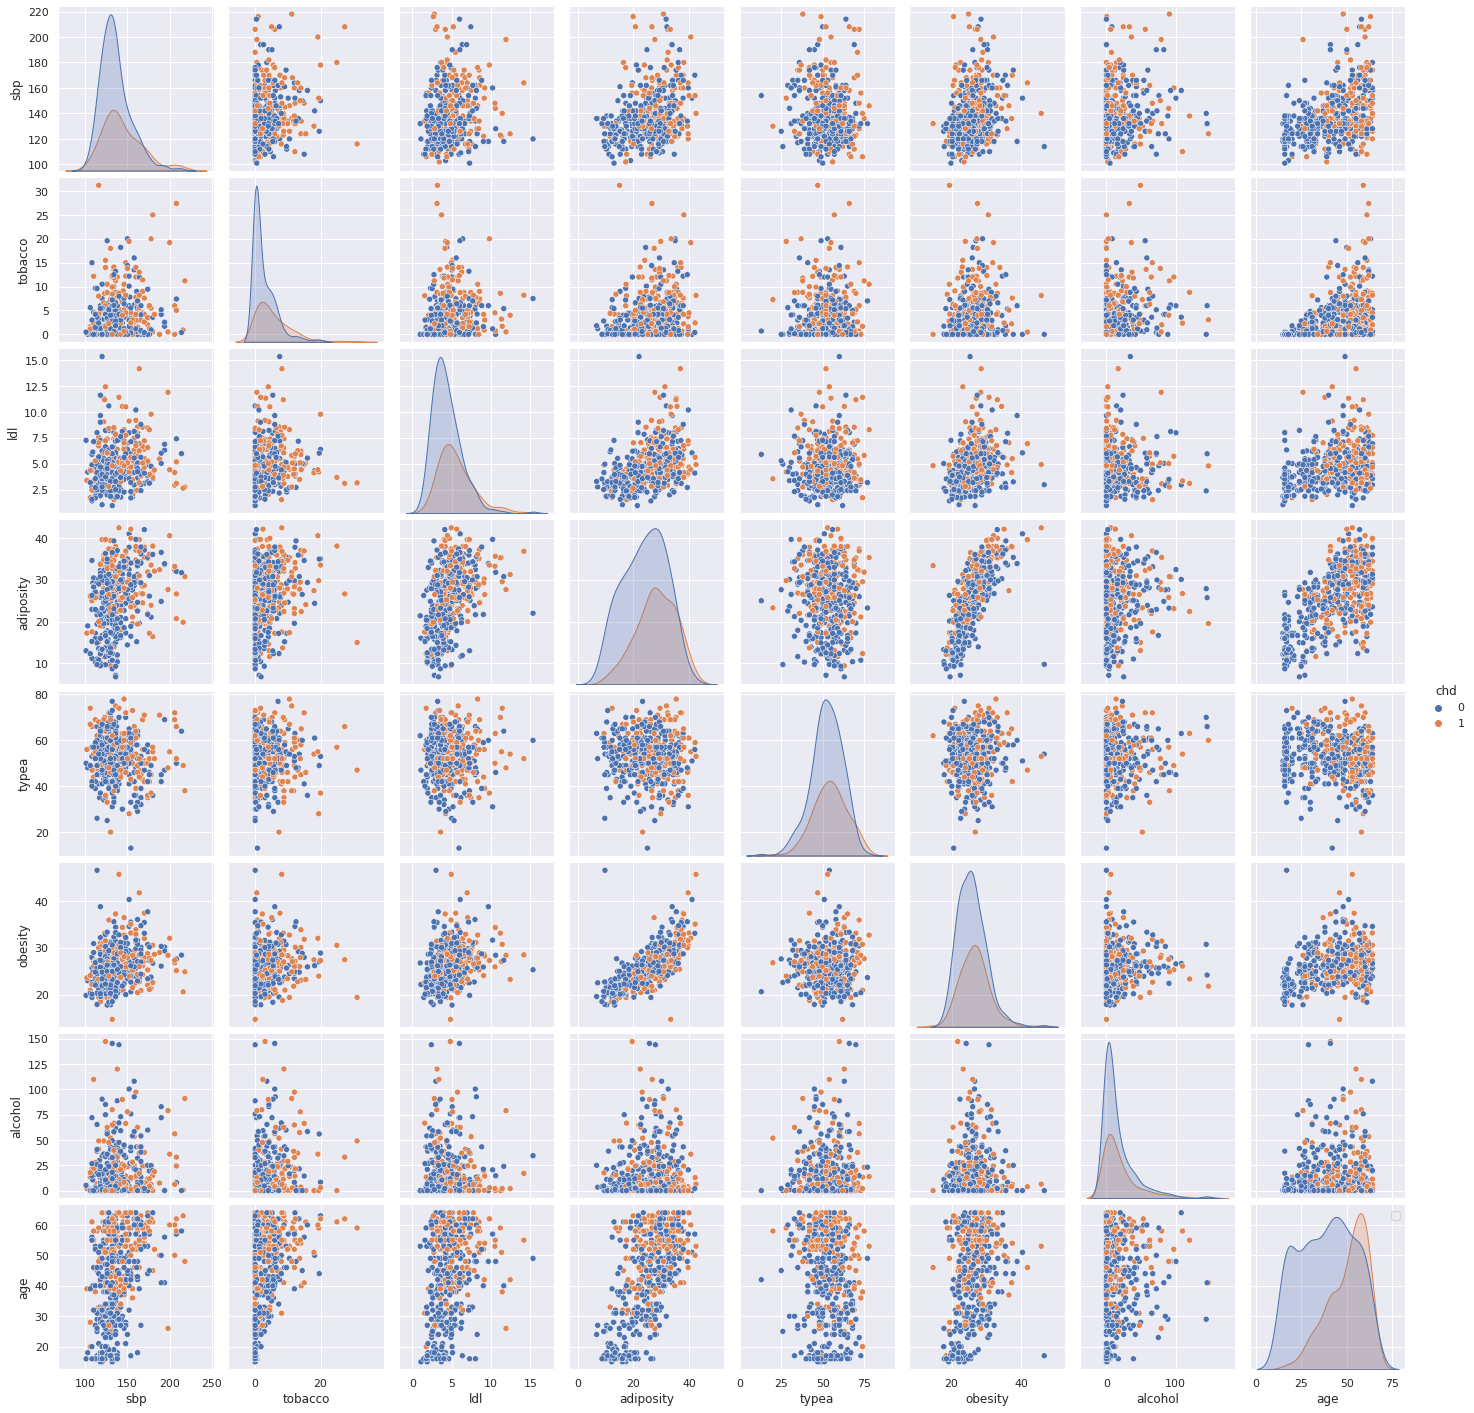

In [ ]:
from ast import increment_lineno
import seaborn as sns
from matplotlib import transforms, pyplot as plt

%matplotlib inline

sns.set()

sns.pairplot(dataset, hue="chd")
plt.legend()
plt.show()

As we can see the variable `famhist` is not present in this plot because is the only one that has text instead of numbers, so we can analize it a bit further.

In [ ]:
print(dataset.famhist.value_counts())


Absent     270
Present    192
Name: famhist, dtype: int64


In [ ]:
dataset['famhist'] = (dataset['famhist'] == 'Present').astype(int)
dataset.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1


In [ ]:
print(dataset.famhist.value_counts())

0    270
1    192
Name: famhist, dtype: int64


No handles with labels found to put in legend.


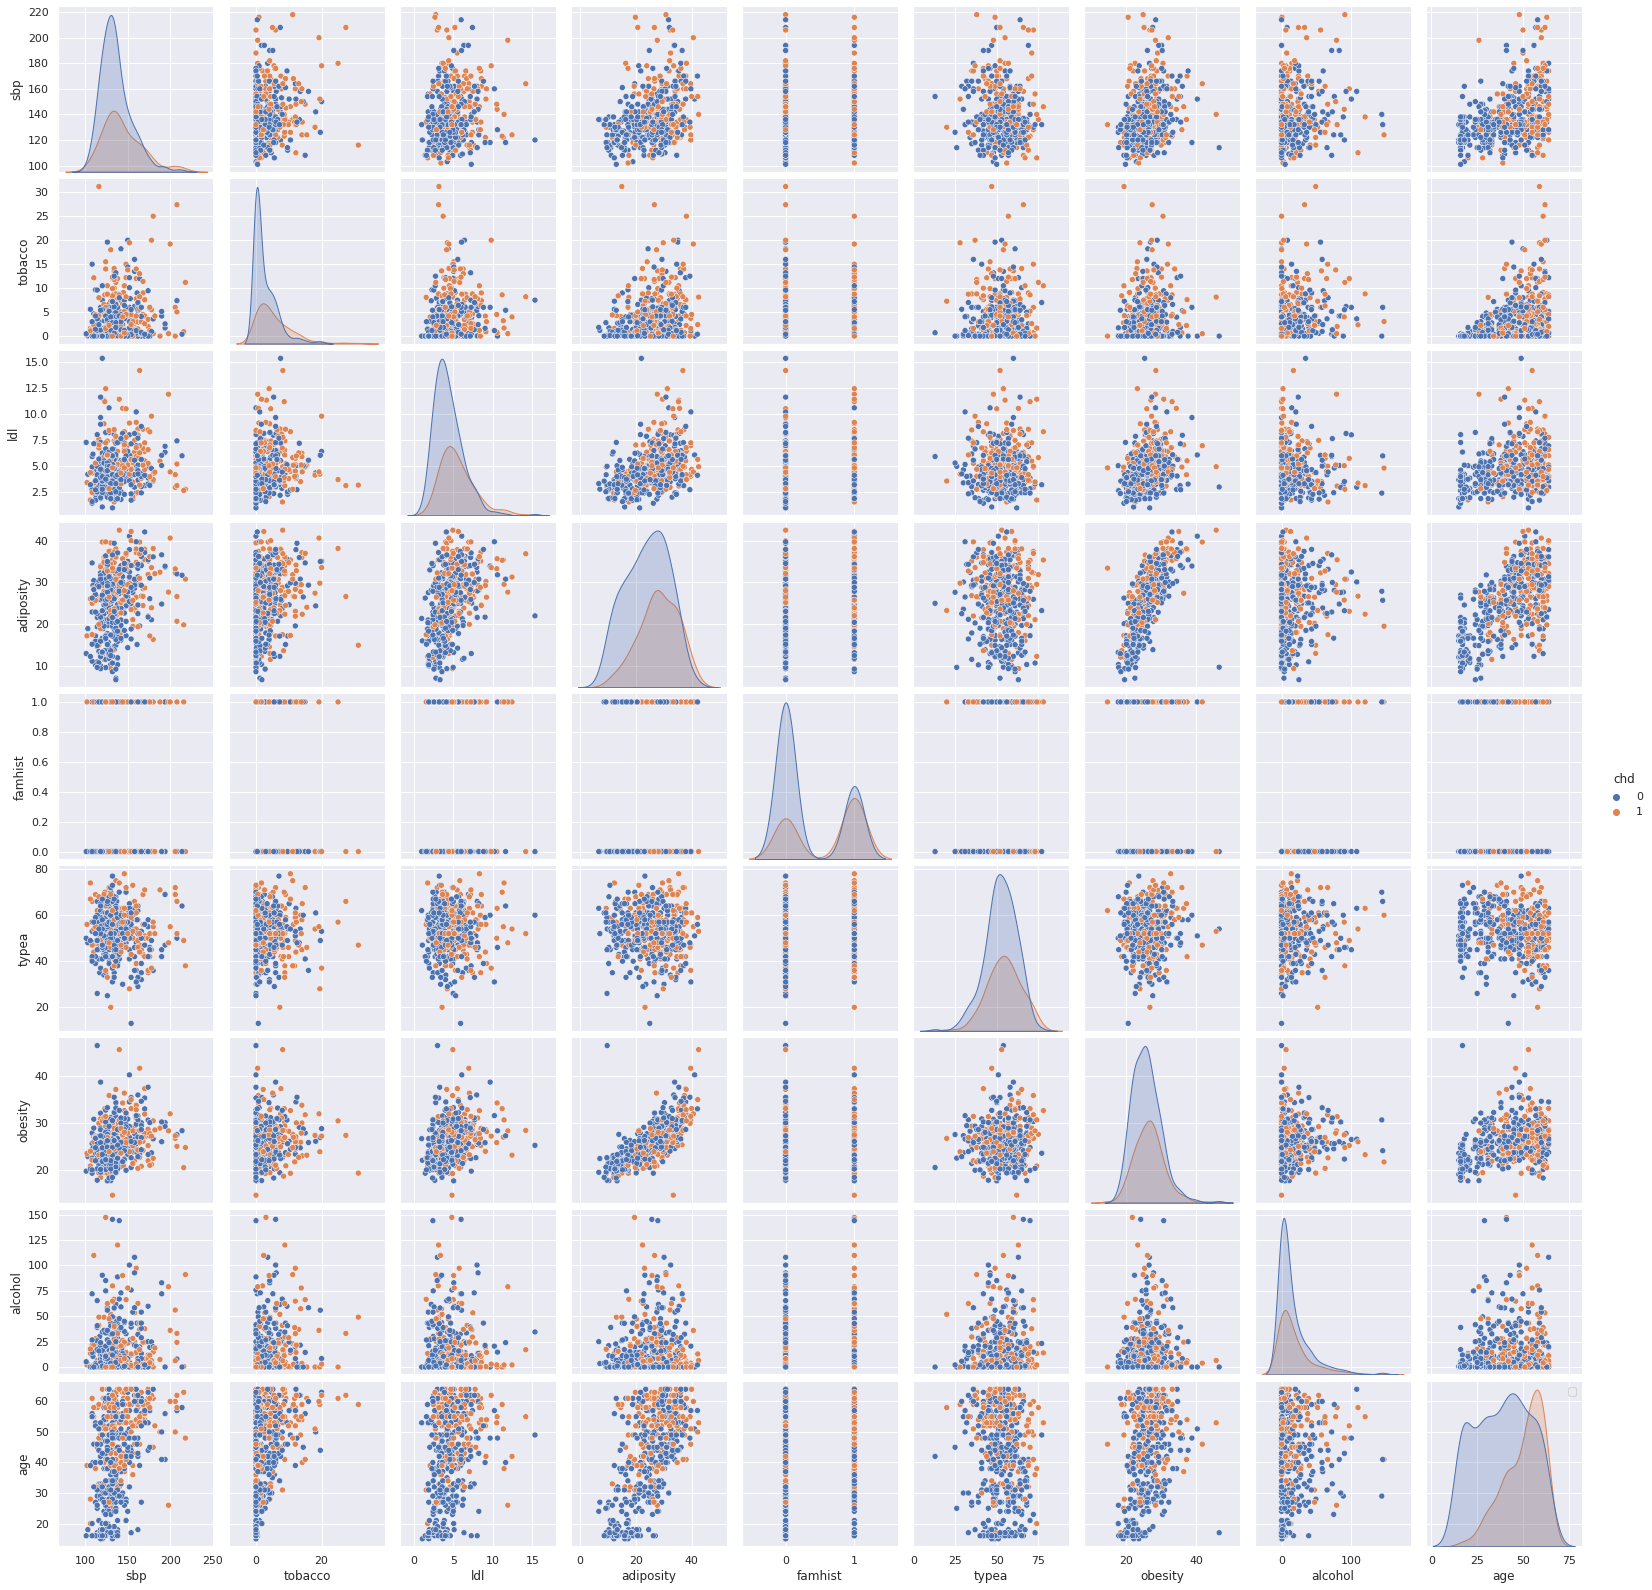

In [ ]:
sns.pairplot(dataset, hue="chd")
plt.legend()
plt.show()

# Logistic regression

In [ ]:
import statsmodels.api as sm
from scipy import stats
#https://www.statsmodels.org/dev/discretemod.html

target = 'chd'

features = ['sbp', 'tobacco', 'ldl', 'famhist', 'obesity', 'alcohol', 'age']
X, y = dataset[features].values, dataset[target].values

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
X_data = sm.add_constant(X)
lr = sm.Logit(y, X_data).fit(disp=False)

result = zip(['(Intercept)'] + features, lr.params, lr.bse, lr.tvalues)
print('               Coefficient   Std. Error   Z Score')
print('-------------------------------------------------')
for term, coefficient, std_err, z_score in result:
    print(f'{term:>12}{coefficient:>14.3f}{std_err:>13.3f}{z_score:>10.3f}')

               Coefficient   Std. Error   Z Score
-------------------------------------------------
 (Intercept)        -4.130        0.964    -4.283
         sbp         0.006        0.006     1.023
     tobacco         0.080        0.026     3.034
         ldl         0.185        0.057     3.218
     famhist         0.939        0.225     4.177
     obesity        -0.035        0.029    -1.187
     alcohol         0.001        0.004     0.136
         age         0.043        0.010     4.181


If we follow the same steps we did in the example from chapter 3, we know that any Z score value that is greater than two is approximatly significant at 5%, so we can discard the values of `sbp`, `obesity`, and `alcohol`.

Now if we repeat the experiment with onlu the features that have significance, then we get the table 4.3 from the book.

In [ ]:
features1 = [ 'tobacco', 'ldl', 'famhist', 'age']
X1, y = dataset[features1].values, dataset[target].values

X_data1 = sm.add_constant(X1)
lr = sm.Logit(y, X_data1).fit(disp=False)

result = zip(['(Intercept)'] + features1, lr.params, lr.bse, lr.tvalues)
print('               Coefficient   Std. Error   Z Score')
print('-------------------------------------------------')
for term, coefficient, std_err, z_score in result:
    print(f'{term:>12}{coefficient:>14.3f}{std_err:>13.3f}{z_score:>10.3f}')

               Coefficient   Std. Error   Z Score
-------------------------------------------------
 (Intercept)        -4.204        0.498    -8.436
     tobacco         0.081        0.026     3.163
         ldl         0.168        0.054     3.093
     famhist         0.924        0.223     4.141
         age         0.044        0.010     4.520


# Logistic Regression With L1 Regularization

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Create a scaler object
sc = StandardScaler()

# Fit the scaler to the training data and transform
X_train_std = sc.fit_transform(X_train)

# Apply the scaler to the test data
X_test_std = sc.transform(X_test)

In [ ]:
C = [10, 1, .1, .001]

for c in C:
    clf = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    clf.fit(X_train, y_train)
    print('C:', c)
    print('Coefficient of each feature:', clf.coef_)
    print('Training accuracy:', clf.score(X_train_std, y_train))
    print('Test accuracy:', clf.score(X_test_std, y_test))
    print('')

C: 10
Coefficient of each feature: [[ 1.02080819e-04  9.41900409e-02  1.59715684e-01  8.12618369e-01
  -3.45831773e-02 -9.34771776e-04  4.50547586e-02]]
Training accuracy: 0.6531165311653117
Test accuracy: 0.6559139784946236

C: 1
Coefficient of each feature: [[-3.79590138e-03  9.55799498e-02  1.53730416e-01  7.41647079e-01
  -4.91292034e-02 -7.22985785e-04  4.41878851e-02]]
Training accuracy: 0.6531165311653117
Test accuracy: 0.6559139784946236

C: 0.1
Coefficient of each feature: [[-1.32099537e-02  9.58801748e-02  1.16162406e-01  1.90108164e-01
  -6.87488454e-02  8.80198567e-05  4.47476186e-02]]
Training accuracy: 0.6449864498644986
Test accuracy: 0.7311827956989247

C: 0.001
Coefficient of each feature: [[-0.00359871  0.          0.          0.          0.          0.
   0.        ]]
Training accuracy: 0.42276422764227645
Test accuracy: 0.3225806451612903



Notice that as C decreases the model coefficients become smaller, until at C=0.001 almost all the coefficients are zero.